In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pickle
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
training_set = image_dataset_from_directory(
    './dataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 29647 files belonging to 6 classes.


In [3]:
validation_set = image_dataset_from_directory(
    './dataset/val',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3776 files belonging to 6 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [5]:
INPUT_SHAPE = (224, 224, 3)

In [6]:
mobnet = tf.keras.applications.MobileNetV3Large(
    input_shape=INPUT_SHAPE,
    alpha=1.0,
    minimalistic=False,
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    classes=1000,
    pooling=None,
    dropout_rate=0.2,
    classifier_activation="softmax",
    include_preprocessing=True,
    # name="MobileNetV3Large",
)

In [7]:
model = tf.keras.models.Sequential()

In [8]:
model.add(tf.keras.Input(shape=INPUT_SHAPE))

In [9]:
model.add(mobnet)

In [10]:
model.add(tf.keras.layers.Dense(units = 6,activation='softmax'))

In [11]:
metrics_list = ['accuracy',
                tf.keras.metrics.F1Score()]

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=metrics_list)

In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         6,006 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,513,438 (21.03 MB)

 Trainable params: 5,489,038 (20.94 MB)

 Non-trainable params: 24,400 (95.31 KB)

In [14]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=15)

Epoch 1/15


927/927 ━━━━━━━━━━━━━━━━━━━━ 1951s 2s/step - accuracy: 0.5108 - f1_score: 0.3711 - loss: 1.7250 - val_accuracy: 0.6144 - val_f1_score: 0.4521 - val_loss: 1.6247
Epoch 2/15
927/927 ━━━━━━━━━━━━━━━━━━━━ 1756s 2s/step - accuracy: 0.6376 - f1_score: 0.4708 - loss: 1.5873 - val_accuracy: 0.6576 - val_f1_score: 0.4675 - val_loss: 1.5085
Epoch 3/15
927/927 ━━━━━━━━━━━━━━━━━━━━ 1687s 2s/step - accuracy: 0.6733 - f1_score: 0.4888 - loss: 1.4731 - val_accuracy: 0.6883 - val_f1_score: 0.5003 - val_loss: 1.4000
Epoch 4/15
927/927 ━━━━━━━━━━━━━━━━━━━━ 1651s 2s/step - accuracy: 0.6940 - f1_score: 0.5067 - loss: 1.3696 - val_accuracy: 0.6875 - val_f1_score: 0.5027 - val_loss: 1.3131
Epoch 5/15
927/927 ━━━━━━━━━━━━━━━━━━━━ 1628s 2s/step - accuracy: 0.6974 - f1_score: 0.5060 - loss: 1.2801 - val_accuracy: 0.6907 - val_f1_score: 0.5027 - val_loss: 1.2391
Epoch 6/15
927/927 ━━━━━━━━━━━━━━━━━━━━ 1630s 2s/step - accuracy: 0.7180 - f1_score: 0.5245 - loss: 1.1886 - val_accuracy: 0.7058 - val_f1_score: 0.514

In [16]:
model.save("./Trained_Skin_Disease_model.h5")
model.save("./Trained_Skin_Disease_model.keras")

In [17]:
model.save("./Trained_Skin_Disease_model.keras")

In [18]:
training_history

In [19]:
training_history.history

{'accuracy': [0.5614396333694458,
  0.6472155451774597,
  0.6793941855430603,
  0.6958208084106445,
  0.703916072845459,
  0.7198030352592468,
  0.7304617762565613,
  0.7389617562294006,
  0.7436502575874329,
  0.7533308863639832,
  0.7595372200012207,
  0.7727257609367371,
  0.7937396764755249,
  0.8014639019966125,
  0.8059163093566895],
 'f1_score': [<tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.51749396, 0.12244007, 0.619863  , 0.00948766, 0.6526751 ,
         0.6389818 ], dtype=float32)>,
  <tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.55256003, 0.        , 0.759166  , 0.        , 0.77924937,
         0.7531712 ], dtype=float32)>,
  <tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.57191515, 0.        , 0.77428114, 0.        , 0.8191407 ,
         0.7962794 ], dtype=float32)>,
  <tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.5822767 , 0.        , 0.80764794, 0.        , 0.840148  ,
         0.81319857], dtype=float32)>,
  <tf.Tensor: shape=(6

In [21]:
#save history
import pickle
with open("Training_history.pkl","wb") as f:
    pickle.dump(training_history.history,f)

In [3]:
#Reloading History from pickle
import pickle
with open('Training_history.pkl', 'rb') as f:
    load_history = pickle.load(f)
load_history

{'accuracy': [0.5614396333694458,
  0.6472155451774597,
  0.6793941855430603,
  0.6958208084106445,
  0.703916072845459,
  0.7198030352592468,
  0.7304617762565613,
  0.7389617562294006,
  0.7436502575874329,
  0.7533308863639832,
  0.7595372200012207,
  0.7727257609367371,
  0.7937396764755249,
  0.8014639019966125,
  0.8059163093566895],
 'f1_score': [<tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.51749396, 0.12244007, 0.619863  , 0.00948766, 0.6526751 ,
         0.6389818 ], dtype=float32)>,
  <tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.55256003, 0.        , 0.759166  , 0.        , 0.77924937,
         0.7531712 ], dtype=float32)>,
  <tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.57191515, 0.        , 0.77428114, 0.        , 0.8191407 ,
         0.7962794 ], dtype=float32)>,
  <tf.Tensor: shape=(6,), dtype=float32, numpy=
  array([0.5822767 , 0.        , 0.80764794, 0.        , 0.840148  ,
         0.81319857], dtype=float32)>,
  <tf.Tensor: shape=(6

In [4]:
load_history.keys()

dict_keys(['accuracy', 'f1_score', 'loss', 'val_accuracy', 'val_f1_score', 'val_loss'])

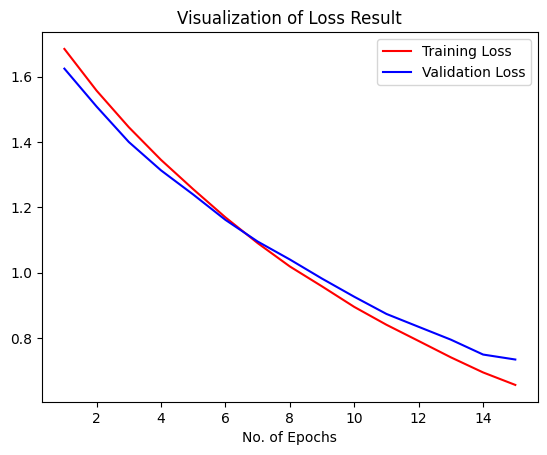

In [5]:
#Loss Visualization
epochs = [i for i in range(1,16)]
plt.plot(epochs,load_history['loss'],color='red',label='Training Loss')
plt.plot(epochs,load_history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

## Model Evaluation

In [9]:
model = tf.keras.models.load_model("Trained_Skin_Disease_model.keras")

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ MobileNetV3Large (Functional)   │ (None, 1000)           │     5,507,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 6)              │         6,006 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,002,478 (41.97 MB)

 Trainable params: 5,489,038 (20.94 MB)

 Non-trainable params: 24,400 (95.31 KB)

 Optimizer params: 5,489,040 (20.94 MB)

In [34]:
test_set = validation_set = image_dataset_from_directory(
    './dataset/test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=64,
    image_size=(224, 224),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3778 files belonging to 6 classes.


In [35]:
test_loss,test_acc,f1_score = model.evaluate(test_set)

60/60 ━━━━━━━━━━━━━━━━━━━━ 42s 683ms/step - accuracy: 0.7285 - f1_score: 0.4333 - loss: 0.9269


In [36]:
test_loss

0.7449111938476562

In [37]:
test_acc

0.7686606645584106

In [38]:
f1_score

<tf.Tensor: shape=(6,), dtype=float32, numpy=
array([0.6399999 , 0.        , 0.9090908 , 0.71186435, 0.91453934,
       0.8478389 ], dtype=float32)>

In [39]:
##Computing True labels from test set
true_categories = tf.concat([y for x, y in test_set], axis=0)
true_categories

<tf.Tensor: shape=(3778, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [40]:

true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

In [41]:
true_categories

<tf.Tensor: shape=(3778, 6), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)>

In [42]:
Y_true

<tf.Tensor: shape=(3778,), dtype=int64, numpy=array([0, 0, 0, ..., 5, 5, 5], dtype=int64)>

In [43]:
##Computing Predicted labels using test set
predicted_categories = model.predict(test_set)
predicted_categories

60/60 ━━━━━━━━━━━━━━━━━━━━ 41s 678ms/step


array([[0.41756272, 0.34521717, 0.03575891, 0.0333234 , 0.09688888,
        0.07124898],
       [0.41756272, 0.34521717, 0.03575891, 0.0333234 , 0.09688888,
        0.07124898],
       [0.18877684, 0.15992683, 0.1308163 , 0.161935  , 0.19240175,
        0.16614325],
       ...,
       [0.03682645, 0.03033935, 0.02676798, 0.01949138, 0.8130036 ,
        0.07357123],
       [0.04084275, 0.03824653, 0.02960609, 0.02135781, 0.12358528,
        0.74636155],
       [0.41756272, 0.34521717, 0.03575891, 0.0333234 , 0.09688888,
        0.07124898]], dtype=float32)

In [44]:
Y_pred = tf.argmax(predicted_categories, axis=1)
Y_pred

<tf.Tensor: shape=(3778,), dtype=int64, numpy=array([0, 0, 4, ..., 4, 5, 0], dtype=int64)>

### 1. Classification Report

In [48]:
import numpy as np
print(np.bincount(Y_true))
print(np.bincount(Y_pred))


[ 620  493  322  134 1360  849]
[1155    0  338  102 1343  840]


In [49]:
print(classification_report(Y_true, Y_pred, zero_division=1))


              precision    recall  f1-score   support

           0       0.49      0.92      0.64       620
           1       1.00      0.00      0.00       493
           2       0.89      0.93      0.91       322
           3       0.82      0.63      0.71       134
           4       0.92      0.91      0.91      1360
           5       0.85      0.84      0.85       849

    accuracy                           0.77      3778
   macro avg       0.83      0.70      0.67      3778
weighted avg       0.84      0.77      0.73      3778



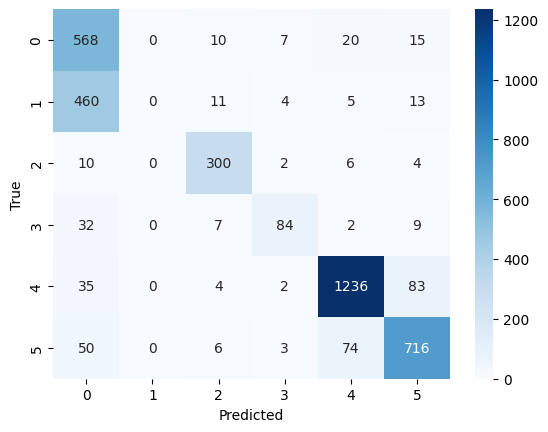

In [52]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_true, Y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_true,Y_pred))

              precision    recall  f1-score   support

           0       0.49      0.92      0.64       620
           1       0.00      0.00      0.00       493
           2       0.89      0.93      0.91       322
           3       0.82      0.63      0.71       134
           4       0.92      0.91      0.91      1360
           5       0.85      0.84      0.85       849

    accuracy                           0.77      3778
   macro avg       0.66      0.70      0.67      3778
weighted avg       0.71      0.77      0.73      3778



c:\Users\ilakshana\.conda\envs\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ilakshana\.conda\envs\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ilakshana\.conda\envs\tensorflow-env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### 2. Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_true,Y_pred)
cm

array([[ 568,    0,   10,    7,   20,   15],
       [ 460,    0,   11,    4,    5,   13],
       [  10,    0,  300,    2,    6,    4],
       [  32,    0,    7,   84,    2,    9],
       [  35,    0,    4,    2, 1236,   83],
       [  50,    0,    6,    3,   74,  716]], dtype=int64)

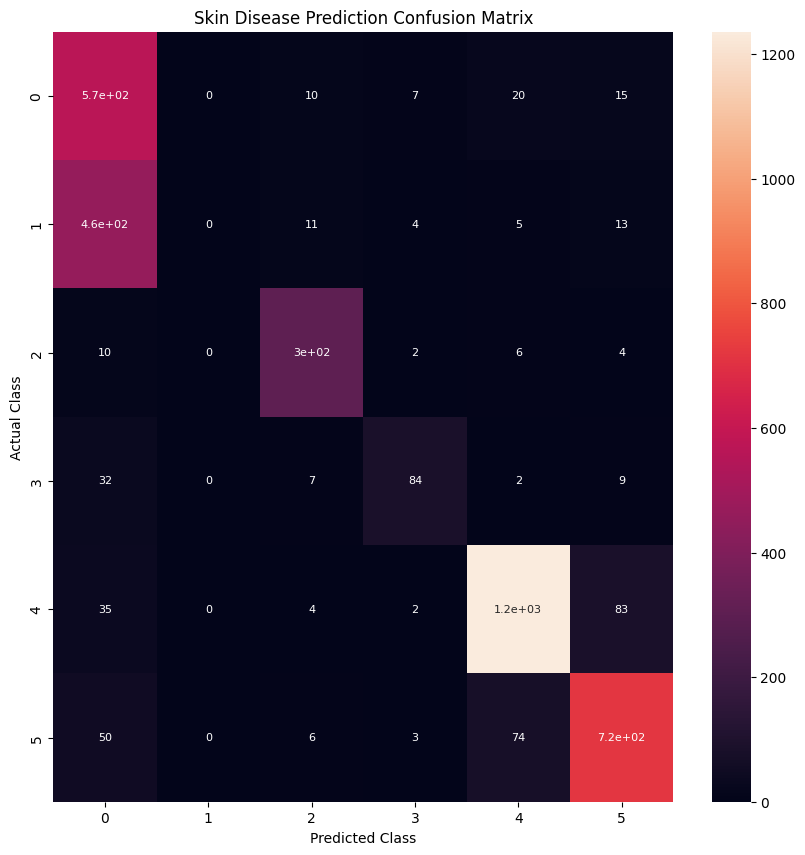

In [47]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True,annot_kws={"size":8})
plt.xlabel("Predicted Class",fontsize=10)
plt.ylabel("Actual Class",fontsize=10)
plt.title("Skin Disease Prediction Confusion Matrix",fontsize=12)
plt.show()